In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import geopandas as gpd
import numpy as np

# Descargar datos de precipitación Hermosillo 2021-2024

In [12]:
# url de Historical Weather API con las coordenadas de hmo y los rangos de fecha buscados
url = 'https://archive-api.open-meteo.com/v1/archive?latitude=29.1026&longitude=-110.9773&start_date=2021-01-01&end_date=2024-11-10&daily=precipitation_sum&timezone=America%2FDenver&format=csv'

ruta_descarga = os.path.dirname(os.getcwd()) + '/data/raw/precipitacion'

# Realizar la descarga y guardar el archivo
response = requests.get(url)
with open(ruta_descarga, 'wb') as f:
    f.write(response.content)

# Cargar el archivo CSV local
df_lluvia_hmo = pd.read_csv(ruta_descarga)

df_lluvia_hmo

,latitude,longitude,elevation,utc_offset_seconds,timezone,timezone_abbreviation
0,29.06854,-110.975876,214.0,-25200.0,America/Denver,MST
1,time,precipitation_sum (mm),NaN,NaN,NaN,NaN
2,2021-01-01,4.00,NaN,NaN,NaN,NaN
3,2021-01-02,0.00,NaN,NaN,NaN,NaN
4,2021-01-03,0.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1407,2024-11-06,0.00,NaN,NaN,NaN,NaN
1408,2024-11-07,0.00,NaN,NaN,NaN,NaN
1409,2024-11-08,0.00,NaN,NaN,NaN,NaN
1410,2024-11-09,0.00,NaN,NaN,NaN,NaN


In [13]:
df_lluvia_hmo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412 entries, 0 to 1411
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   latitude               1412 non-null   object 
 1   longitude              1412 non-null   object 
 2   elevation              1 non-null      float64
 3   utc_offset_seconds     1 non-null      float64
 4   timezone               1 non-null      object 
 5   timezone_abbreviation  1 non-null      object 
dtypes: float64(2), object(4)
memory usage: 66.3+ KB


In [14]:
# Quitamos las primeras dos filas inecesarias y reseteamos el indice
df_lluvia_hmo.drop([0, 1], inplace=True)
df_lluvia_hmo.reset_index(drop=True, inplace=True)

# Quitamos columnas mal hechas debido a la estructura
df_lluvia_hmo.drop(['elevation', 'utc_offset_seconds', 'timezone', 'timezone_abbreviation'], axis=1, inplace=True)
# Renombramos adecuadamente las columnas que nos interesan
df_lluvia_hmo.rename(columns={'latitude': 'time', 'longitude': 'precipitation_sum (mm)'}, inplace=True)
# Quitamos filas con nulos
df_lluvia_hmo.dropna(inplace=True)

# Definimos correctamente los tipos de datos
df_lluvia_hmo['time'] = pd.to_datetime(df_lluvia_hmo['time'])
df_lluvia_hmo['precipitation_sum (mm)'] = df_lluvia_hmo['precipitation_sum (mm)'].astype(float)

# Seleccionamos un rango de fechas
df_lluvia_hmo[(df_lluvia_hmo['time'] >= '2021-09-01') & (df_lluvia_hmo['time'] <= '2024-11-09')].reset_index(drop=True, inplace=True)

df_lluvia_hmo

,time,precipitation_sum (mm)
0,2021-01-01,4.0
1,2021-01-02,0.0
2,2021-01-03,0.0
3,2021-01-04,0.0
4,2021-01-05,0.0
...,...,...
1405,2024-11-06,0.0
1406,2024-11-07,0.0
1407,2024-11-08,0.0
1408,2024-11-09,0.0


In [15]:
df_lluvia_hmo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1410 entries, 0 to 1409
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   time                    1410 non-null   datetime64[ns]
 1   precipitation_sum (mm)  1410 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.2 KB


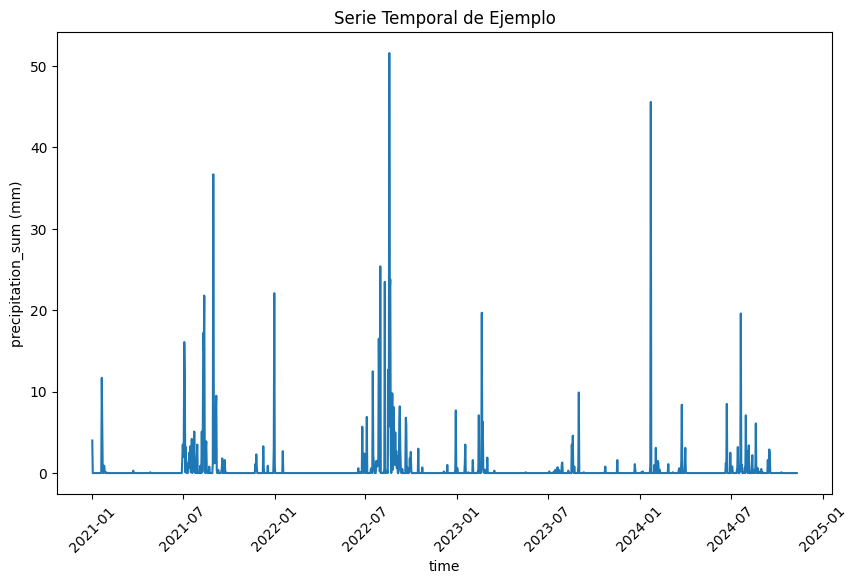

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='time', y='precipitation_sum (mm)', data=df_lluvia_hmo)
# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visualización
plt.title('Serie Temporal de Ejemplo')
plt.show()

# Descarga datos baches y se

In [17]:
directorio = os.path.dirname(os.getcwd())

In [18]:
baches = gpd.read_file(directorio + '/data/processed/tidy_baches_agebs_hmo.shp')
baches.CVEGEO = baches.CVEGEO.str[-4:]
se_ageb = gpd.read_file(directorio + '/data/processed/tidy_socioeconimico_ageb_hermosillo.shp')
se = pd.read_csv(directorio + '/data/processed/tidy_socioeconomico_hermosillo.csv')

In [19]:
se_ageb.head()

,CVEGEO,POB_TOT,IM_2020,GM_2020,IMN_2020,geometry
0,1869,2202,124.621888,Muy bajo,0.973499,"POLYGON ((-110.96937 29.10507, -110.96743 29.1..."
1,1746,4174,123.081816,Bajo,0.961469,"POLYGON ((-110.97069 29.11309, -110.97075 29.1..."
2,2246,14443,123.411364,Bajo,0.964043,"POLYGON ((-111.02225 29.11919, -111.02225 29.1..."
3,1750,2722,123.840916,Muy bajo,0.967399,"POLYGON ((-110.96556 29.12518, -110.96548 29.1..."
4,1799,2271,122.126926,Bajo,0.954010,"POLYGON ((-110.98623 29.10081, -110.98628 29.1..."


In [20]:
baches = baches.dropna()

In [21]:
baches.head()

,latitude,longitude,CVEGEO,date,neighborho,descriptio,geometry
0,29.094161,-110.969471,1996,2021-10-18,[551],"Hay un bache en la calle, y los carros se golp...",POINT (-110.96947 29.09416)
1,29.124060,-110.971318,1746,2021-10-19,[601],"Buen dia! Para reportar pavimento dañado, bach...",POINT (-110.97132 29.12406)
2,29.123985,-110.971286,1746,2021-10-19,[601],"Buen dia! Para reportar pavimento dañado, bach...",POINT (-110.97129 29.12399)
3,29.128777,-110.953926,5043,2021-10-21,[49],toda la calle desde el blvd Morelos tiene vari...,POINT (-110.95393 29.12878)
4,29.083809,-111.042101,2617,2021-10-04,[74],C. SOLICITA BACHEO ASEGURA REPORTANTE QUE ES P...,POINT (-111.0421 29.08381)


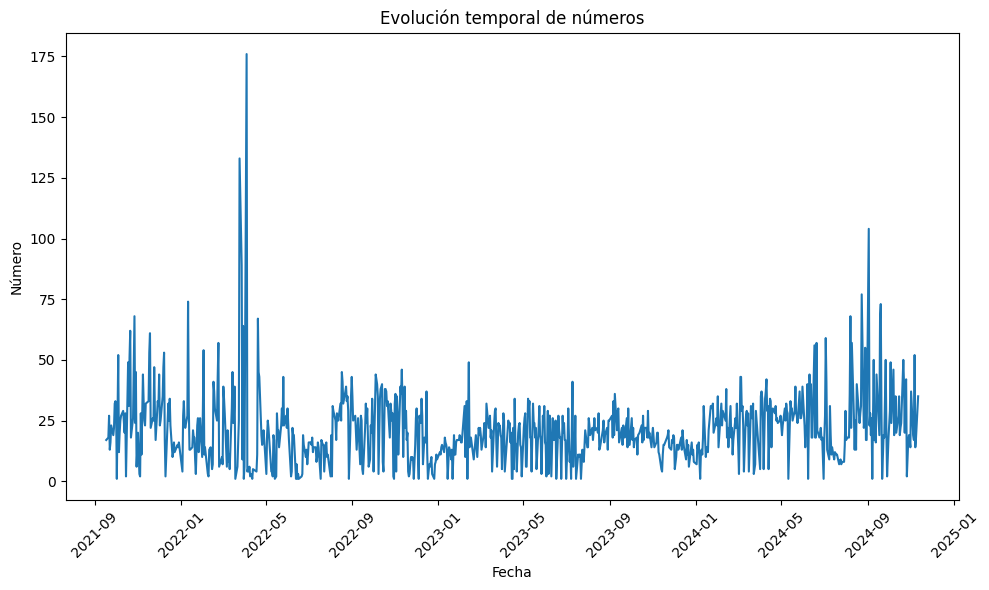

In [22]:
baches_por_fecha = baches.groupby('date',as_index=False).size()

plt.figure(figsize=(10, 6))
plt.plot(baches_por_fecha['date'], baches_por_fecha['size'])

# Configuración de etiquetas y título
plt.xlabel("Fecha")
plt.ylabel("Número")
plt.title("Evolución temporal de números")

# Rotar las etiquetas de las fechas en el eje x para mejorar la legibilidad
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [23]:
baches_por_fecha

,date,size
0,2021-09-17,17
1,2021-09-20,18
2,2021-09-21,27
3,2021-09-22,13
4,2021-09-23,16
...,...,...
835,2024-11-05,17
836,2024-11-06,52
837,2024-11-07,14
838,2024-11-08,18


# Análisis Exploratorio

In [24]:
df_lluvia_baches = pd.merge(df_lluvia_hmo, baches_por_fecha, left_on='time', right_on='date', how='inner')

In [25]:
df_lluvia_baches

,time,precipitation_sum (mm),date,size
0,2021-09-17,0.5,2021-09-17,17
1,2021-09-20,0.4,2021-09-20,18
2,2021-09-21,0.0,2021-09-21,27
3,2021-09-22,0.0,2021-09-22,13
4,2021-09-23,1.6,2021-09-23,16
...,...,...,...,...
834,2024-11-04,0.0,2024-11-04,19
835,2024-11-05,0.0,2024-11-05,17
836,2024-11-06,0.0,2024-11-06,52
837,2024-11-07,0.0,2024-11-07,14


correlacion de lluvia por año